In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df= pd.read_csv('../data/01-modified-data/ADHD_clean.csv')

In [8]:
df.head()

,id,body,score
0,c08otkh,deleted,1.0
1,c09y8qz,try look right get distracted never remember w...,2.0
2,c09yia6,potassium used thing stop heart beating lethal...,2.0
3,c0a81e6,ive love link anything say taste kcl seriously...,3.0
4,c0aixrg,dont know anything specific would definitely l...,2.0


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample DataFrame (replace this with your own dataset)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['body'], df['score'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Feature selection using Mutual Information
mi_selector = SelectKBest(mutual_info_classif, k=1000)
X_train_selected = mi_selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = mi_selector.transform(X_test_tfidf)

# Naive Bayes Classification
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_selected, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.45
Classification Report:
               precision    recall  f1-score   support

         1.0       0.62      0.73      0.67        11
         2.0       0.14      0.25      0.18         4
         3.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         1

    accuracy                           0.45        20
   macro avg       0.15      0.20      0.17        20
weighted avg       0.37      0.45      0.40        20



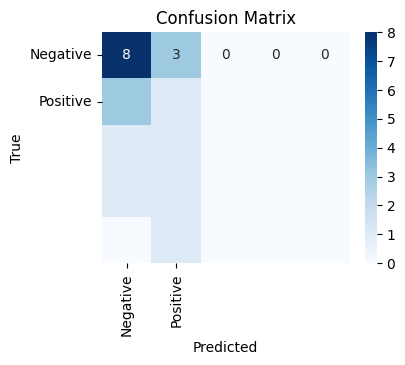

In [11]:
#3 visualisations for text data
# Visualize Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

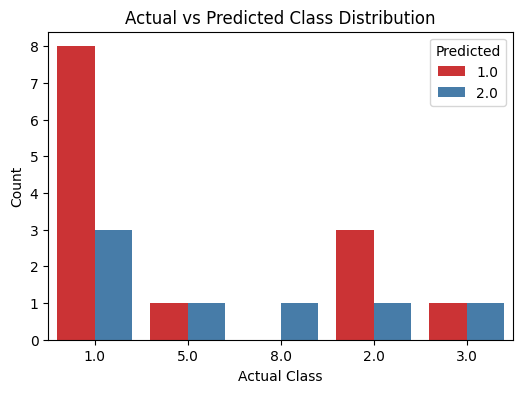

In [16]:
# Convert numeric labels to strings for visualization
y_test_str = y_test.astype(str)
y_pred_str = y_pred.astype(str)

# Create a DataFrame for easier plotting
result_df = pd.DataFrame({'Actual': y_test_str, 'Predicted': y_pred_str})

# Plot the distribution of predicted classes compared to actual classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Actual', hue='Predicted', data=result_df, palette='Set1')
plt.title('Actual vs Predicted Class Distribution')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.show()

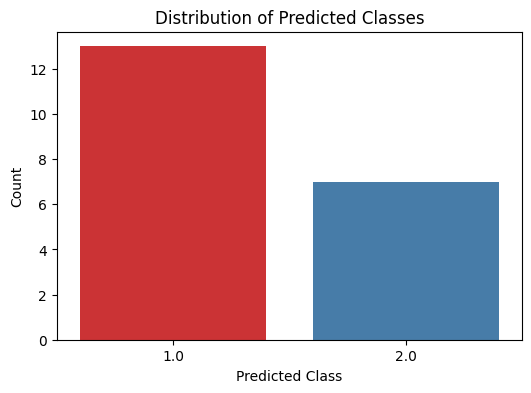

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Predicted', data=result_df, palette='Set1')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()